In [2]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

import csv
import cc_acquire
import cc_prepare

In [13]:
df = cc_acquire.get_bach_df()

dataframe shape: (71901, 125)


In [14]:
# rename the cols
df = cc_prepare.clean_college_df(df)

In [15]:
# df = cc_prepare.treat_bach_nulls(df)
df.shape

(71901, 125)

In [16]:
# categorize_major(column)??
df['major_category'] = df.major_name.apply(cc_prepare.categorize_major)

In [17]:
df.head()

,unit_id_institution,college_name,institution_control,city,state_post_code,zip_code,share_entering_students_first_ft,share_of_part_time,pred_degree,religion_ipeds,...,median_debt_0_30000,median_debt_male,median_debt_30001_75000,median_debt_non_pell,median_debt_non_first_generation,median_debt_75001+,median_debt_completed,fedral_loan_full_time_first_time_undergraduate,pell_grant_full_time_first_time_undergraduate,major_category
0,100654,Alabama A & M University,Public,Normal,AL,35762,0.90,0.06,3.00,5.00,...,15500,14250,16000,10250,16421,14518,33375,0.71,0.71,Agriculture
1,100654,Alabama A & M University,Public,Normal,AL,35762,0.90,0.06,3.00,5.00,...,15500,14250,16000,10250,16421,14518,33375,0.71,0.71,Biology and Life Sciences
2,100654,Alabama A & M University,Public,Normal,AL,35762,0.90,0.06,3.00,5.00,...,15500,14250,16000,10250,16421,14518,33375,0.71,0.71,Biology and Life Sciences
5,100654,Alabama A & M University,Public,Normal,AL,35762,0.90,0.06,3.00,5.00,...,15500,14250,16000,10250,16421,14518,33375,0.71,0.71,Biology and Life Sciences
6,100654,Alabama A & M University,Public,Normal,AL,35762,0.90,0.06,3.00,5.00,...,15500,14250,16000,10250,16421,14518,33375,0.71,0.71,Agriculture


In [18]:
df.to_csv('ba_cleaned_with_major.csv')

In [9]:
ipum = pd.read_csv('earnings_df.csv')
ipum.head()

,Unnamed: 0,earning_year,earnings_degree,earnings_school_type,earnings_degree.1,earnings_wage/salary,EMPSTAT,METRO,SEX,AGE,earnings_race,earnings_speaks_english,LANGUAGE,earnings_specific_degree,state_post_code,major_category
0,2762990,2017,101,1,61,38500,1,0,2,31,1,3,1,6100,AL,Medical and Health Sciences and Services
1,2763006,2017,101,1,62,120000,1,4,1,30,2,3,1,6203,AL,Business
2,2763007,2017,101,1,40,50000,1,4,1,26,2,3,1,4002,AL,Interdisciplinary and Multi-Disciplinary Studi...
3,2763029,2017,101,1,61,65000,1,4,2,49,1,3,1,6107,AL,Medical and Health Sciences and Services
4,2763031,2017,101,1,33,42000,1,4,2,34,1,3,1,3301,AL,"English Language, Literature, and Composition"


In [47]:
ipum.groupby(['major_category','earning_year'])['earnings_wage/salary'].mean().to_csv('2017_2018_2019_earning_by_major.csv')

In [ ]:
# Precision Production and Industrial Arts doesn't have record in ipum

In [51]:
p_avg = pd.read_csv('2017_2018_2019_earning_by_major.csv')
p_avg

,major_category,2017,2018,2019,Grand Total
0,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"
1,Architecture,"68,643.59","71,344.26","75,609.81","215,597.67"
2,"Area, Ethnic, and Civilization Studies","53,999.93","56,155.89","60,997.54","171,153.36"
3,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74"
4,Business,"74,813.94","76,724.07","79,608.39","231,146.40"
5,Communication Technologies,"50,630.58","53,303.00","56,882.68","160,816.25"
6,Communications,"61,311.56","63,458.16","66,997.75","191,767.47"
7,Computer and Information Sciences,"83,482.41","87,552.61","91,321.98","262,357.00"
8,Construction Services,"85,101.29","85,776.30","91,583.25","262,460.84"
9,Cosmetology Services and Culinary Arts,"42,217.78","45,696.22","48,408.92","136,322.92"


In [3]:
df = pd.read_csv('merged_df.csv',index_col=[0])
df.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,Grand Total
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.02,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.02,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"
2,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,0.03,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"
3,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,0.03,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"
4,"101,541.00",Judson College,"Private, nonprofit",AL,36756,Marion,5.00,1.00,3.00,3.00,...,0.07,0.24,0.10,0.04,9.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49"


In [5]:
df.columns.tolist()

['unit_id_institution',
 'college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'avg_net_price_program',
 'avg_net_price_other',
 'title_IV_student_number',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',


In [4]:
df.shape

(71422, 124)

In [5]:
def avg_net_price(df):
    df['avg_net_price_public'].fillna(0, inplace=True)
    df['avg_net_price_private'].fillna(0, inplace=True)
    df['avg_net_price'] = df.avg_net_price_public + df.avg_net_price_private
    return df

In [6]:
df = avg_net_price(df)

In [7]:
df.shape

(71422, 125)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71422 entries, 0 to 71421
Columns: 125 entries, unit_id_institution to avg_net_price
dtypes: float64(115), int64(2), object(8)
memory usage: 68.7+ MB


In [23]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7824 entries, 12 to 42012
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    7824 non-null   object 
 1   lat     7824 non-null   float64
 2   lng     7824 non-null   float64
dtypes: float64(2), object(1)
memory usage: 244.5+ KB


In [21]:
df.columns.tolist()

['unit_id_institution',
 'college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'avg_net_price_program',
 'avg_net_price_other',
 'title_IV_student_number',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',


In [12]:
us = us[['city','lat','lng']]
us.head()

,city,lat,lng
12,New York,40.69,-73.92
27,Los Angeles,34.11,-118.41
51,Chicago,41.84,-87.69
91,Miami,25.78,-80.21
108,Dallas,32.79,-96.77


In [18]:
us.city.value_counts()

Springfield      16
Franklin         16
Washington       16
Clinton          14
Jackson          13
                 ..
Half Moon Bay     1
Waycross          1
Greeneville       1
North Haven       1
Midfield          1
Name: city, Length: 6068, dtype: int64

In [191]:
us.shape

(7824, 3)

In [20]:
us.city.value_counts()

Springfield      16
Franklin         16
Washington       16
Clinton          14
Jackson          13
                 ..
Half Moon Bay     1
Waycross          1
Greeneville       1
North Haven       1
Midfield          1
Name: city, Length: 6068, dtype: int64

In [28]:
us[us.city == 'Springfield']

,city,lat,lng
1193,Springfield,42.12,-72.54
2146,Springfield,37.19,-93.29
3442,Springfield,39.77,-89.65
10679,Springfield,39.93,-83.80
11756,Springfield,44.05,-122.98
16012,Springfield,38.78,-77.18
18654,Springfield,39.93,-75.34
20948,Springfield,40.10,-75.20
21845,Springfield,36.49,-86.87
22434,Springfield,40.70,-74.33


In [19]:
df.city.value_counts()

New York         809
Chicago          604
Philadelphia     536
Boston           494
Washington       447
                ... 
Ramsey             1
Brimley            1
North Chicago      1
Elyria             1
Leesport           1
Name: city, Length: 1288, dtype: int64

In [26]:
df1 = pd.merge(df, us, how = 'inner', on='city')
df1.shape

(158790, 127)

In [27]:
71422/158790

0.44978902953586497

In [14]:
us[us.city == 'Chicago']

,city,lat,lng
51,Chicago,41.84,-87.69


In [200]:
df[df.city == 'Chicago']

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,Grand Total,avg_net_price
1472,"144,005.00",Chicago State University,Public,IL,60628-1598,Chicago,3.00,1.00,3.00,3.00,...,0.15,0.19,0.01,3.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","11,365.00"
1473,"144,005.00",Chicago State University,Public,IL,60628-1598,Chicago,3.00,1.00,3.00,3.00,...,0.15,0.19,0.01,3.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","11,365.00"
1474,"144,050.00",University of Chicago,"Private, nonprofit",IL,60637,Chicago,3.00,1.00,3.00,3.00,...,0.00,0.00,0.04,32.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","26,160.00"
1475,"144,050.00",University of Chicago,"Private, nonprofit",IL,60637,Chicago,3.00,1.00,3.00,3.00,...,0.00,0.00,0.04,32.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","26,160.00"
1476,"144,050.00",University of Chicago,"Private, nonprofit",IL,60637,Chicago,3.00,1.00,3.00,3.00,...,0.00,0.00,0.04,32.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","26,160.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71027,"145,600.00",University of Illinois Chicago,Public,IL,60607,Chicago,3.00,1.00,3.00,3.00,...,0.09,0.15,0.01,348.00,"Area, Ethnic, and Civilization Studies","53,999.93","56,155.89","60,997.54","171,153.36","13,301.00"
71028,"145,600.00",University of Illinois Chicago,Public,IL,60607,Chicago,3.00,1.00,3.00,3.00,...,0.09,0.15,0.01,348.00,"Area, Ethnic, and Civilization Studies","53,999.93","56,155.89","60,997.54","171,153.36","13,301.00"
71031,"146,719.00",Loyola University Chicago,"Private, nonprofit",IL,60660,Chicago,3.00,1.00,3.00,3.00,...,0.12,0.24,0.01,192.00,"Area, Ethnic, and Civilization Studies","53,999.93","56,155.89","60,997.54","171,153.36","34,024.00"
71034,"147,776.00",Northeastern Illinois University,Public,IL,60625-4699,Chicago,3.00,1.00,3.00,3.00,...,0.02,0.24,0.03,84.00,"Area, Ethnic, and Civilization Studies","53,999.93","56,155.89","60,997.54","171,153.36","19,287.00"


In [168]:
df.to_csv('merged_df_with_avg_price_location.csv')

In [178]:
df.shape

(158790, 127)

In [170]:
x = pd.read_csv('merged_df_with_avg_price_location.csv',index_col=[0])
x.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,Grand Total,avg_net_price,lat,lng
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","14,444.00",40.52,-88.99
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","14,444.00",40.52,-88.99
2,"145,813.00",Illinois State University,Public,IL,61790-1000,Normal,3.00,1.00,3.00,3.00,...,0.02,63.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","21,301.00",40.52,-88.99
3,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,153.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","14,444.00",40.52,-88.99
4,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,153.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","152,319.74","14,444.00",40.52,-88.99


In [172]:
x.shape

(158790, 127)

In [135]:
df.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,Grand Total,avg_net_price
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","14,444.00"
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","14,444.00"
2,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","23,696.00"
3,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","23,696.00"
4,"101,541.00",Judson College,"Private, nonprofit",AL,36756,Marion,5.00,1.00,3.00,3.00,...,0.24,0.10,0.04,9.00,Agriculture,"57,605.69","55,517.87","61,388.93","174,512.49","16,619.00"


In [137]:
df.avg_net_price.isnull().sum()

0

In [123]:
# test for adding avg price

x = df[['avg_net_price_public','avg_net_price_private']]
x.head()

,avg_net_price_public,avg_net_price_private
0,"14,444.00",0.00
1,"14,444.00",0.00
2,"23,696.00",0.00
3,"23,696.00",0.00
4,0.00,"16,619.00"


In [116]:
x = x.fillna(0)
x.head()

,avg_net_price_public,avg_net_price_private
0,"14,444.00",0.00
1,"14,444.00",0.00
2,"23,696.00",0.00
3,"23,696.00",0.00
4,0.00,"16,619.00"


In [117]:
x['avg_net_price'] = x.avg_net_price_public + x.avg_net_price_private
x.head()

,avg_net_price_public,avg_net_price_private,avg_net_price
0,"14,444.00",0.00,"14,444.00"
1,"14,444.00",0.00,"14,444.00"
2,"23,696.00",0.00,"23,696.00"
3,"23,696.00",0.00,"23,696.00"
4,0.00,"16,619.00","16,619.00"


In [118]:
x['check'] = x.avg_net_price - x.avg_net_price_public - x.avg_net_price_private
x.head()

,avg_net_price_public,avg_net_price_private,avg_net_price,check
0,"14,444.00",0.00,"14,444.00",0.00
1,"14,444.00",0.00,"14,444.00",0.00
2,"23,696.00",0.00,"23,696.00",0.00
3,"23,696.00",0.00,"23,696.00",0.00
4,0.00,"16,619.00","16,619.00",0.00


In [119]:
x[x.check != 0]

,avg_net_price_public,avg_net_price_private,avg_net_price,check


In [120]:
x[x.avg_net_price == 0]

,avg_net_price_public,avg_net_price_private,avg_net_price,check
466,0.00,0.00,0.00,0.00
470,0.00,0.00,0.00,0.00
471,0.00,0.00,0.00,0.00
472,0.00,0.00,0.00,0.00
473,0.00,0.00,0.00,0.00
...,...,...,...,...
71403,0.00,0.00,0.00,0.00
71404,0.00,0.00,0.00,0.00
71405,0.00,0.00,0.00,0.00
71406,0.00,0.00,0.00,0.00


In [113]:
x.shape

(71422, 6)

In [114]:
4704/71422

0.06586205930945647

In [30]:
location = pd.read_csv('worldcities.csv')
location.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.68,139.77,Japan,JP,JPN,Tōkyō,primary,"39,105,000.00",1392685764
1,Jakarta,Jakarta,-6.21,106.85,Indonesia,ID,IDN,Jakarta,primary,"35,362,000.00",1360771077
2,Delhi,Delhi,28.67,77.22,India,IN,IND,Delhi,admin,"31,870,000.00",1356872604
3,Manila,Manila,14.60,120.98,Philippines,PH,PHL,Manila,primary,"23,971,000.00",1608618140
4,São Paulo,Sao Paulo,-23.55,-46.63,Brazil,BR,BRA,São Paulo,admin,"22,495,000.00",1076532519


In [31]:
us = location[location.country == 'United States']
us.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
12,New York,New York,40.69,-73.92,United States,US,USA,New York,NaN,"18,713,220.00",1840034016
27,Los Angeles,Los Angeles,34.11,-118.41,United States,US,USA,California,NaN,"12,750,807.00",1840020491
51,Chicago,Chicago,41.84,-87.69,United States,US,USA,Illinois,NaN,"8,604,203.00",1840000494
91,Miami,Miami,25.78,-80.21,United States,US,USA,Florida,NaN,"6,445,545.00",1840015149
108,Dallas,Dallas,32.79,-96.77,United States,US,USA,Texas,NaN,"5,743,938.00",1840019440


In [32]:
us = us[['city','lat','lng','admin_name']]
us.head()

,city,lat,lng,admin_name
12,New York,40.69,-73.92,New York
27,Los Angeles,34.11,-118.41,California
51,Chicago,41.84,-87.69,Illinois
91,Miami,25.78,-80.21,Florida
108,Dallas,32.79,-96.77,Texas


In [64]:
us.to_csv('location_info_city.csv')

In [138]:
col = ['unit_id_institution','region_ipeds','pred_degree','pred_degree_0and4','Grand Total','zip_code',
       'degree_name','degree_code','major_code','major_name']
df_explore = df.drop(columns = col)

In [139]:
df_explore.head()

,college_name,institution_control,state_post_code,city,title_IV_eligibility,branch_number,avg_net_price_public,avg_net_price_private,avg_net_price_program,avg_net_price_other,...,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,avg_net_price
0,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.02,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","14,444.00"
1,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.02,0.00,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","14,444.00"
2,Auburn University,Public,AL,Auburn,1.00,1.00,"23,696.00",0.00,NaN,NaN,...,0.03,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","23,696.00"
3,Auburn University,Public,AL,Auburn,1.00,1.00,"23,696.00",0.00,NaN,NaN,...,0.03,0.06,0.23,0.01,481.00,Agriculture,"57,605.69","55,517.87","61,388.93","23,696.00"
4,Judson College,"Private, nonprofit",AL,Marion,1.00,1.00,0.00,"16,619.00",NaN,NaN,...,0.07,0.24,0.10,0.04,9.00,Agriculture,"57,605.69","55,517.87","61,388.93","16,619.00"


In [140]:
df_explore = df_explore.merge(us,on='city',how = 'inner')
df_explore.head()

,college_name,institution_control,state_post_code,city,title_IV_eligibility,branch_number,avg_net_price_public,avg_net_price_private,avg_net_price_program,avg_net_price_other,...,deg_percent_awarded_business_management,deg_percent_awarded_history.1,non_deg_seeking,major_category,2017,2018,2019,avg_net_price,lat,lng
0,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","14,444.00",40.52,-88.99
1,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.16,0.00,153.00,Agriculture,"57,605.69","55,517.87","61,388.93","14,444.00",40.52,-88.99
2,Illinois State University,Public,IL,Normal,1.00,1.00,"21,301.00",0.00,NaN,NaN,...,0.23,0.02,63.00,Agriculture,"57,605.69","55,517.87","61,388.93","21,301.00",40.52,-88.99
3,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.16,0.00,153.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","14,444.00",40.52,-88.99
4,Alabama A & M University,Public,AL,Normal,1.00,1.00,"14,444.00",0.00,NaN,NaN,...,0.16,0.00,153.00,Biology and Life Sciences,"48,851.91","50,004.54","53,463.29","14,444.00",40.52,-88.99


<AxesSubplot:xlabel='lng', ylabel='lat'>

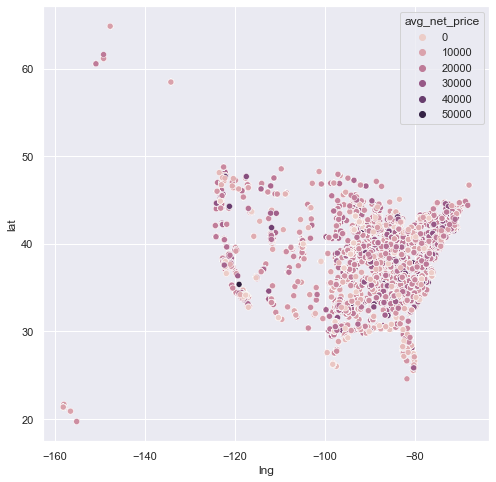

In [141]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='lng', y='lat', data=df_explore, hue = 'avg_net_price')

In [142]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})    
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [143]:
nulls_by_col(df_explore).head(10)

,num_rows_missing,percent_rows_missing
avg_net_price_other,158790,100.00
avg_net_price_program,158790,100.00
med_parent_and_pell,153751,96.83
avg_parent_and_pell,150096,94.52
med_parent_and_loan,141502,89.11
med_monthly_payment_parent_and_debt,141502,89.11
avg_parent_and_loan,136814,86.16
avg_stafford_and_pell,136245,85.80
avg_stafford_and_no_pell_recipients,136122,85.72
med_stafford_and_no_pell_recipients,132391,83.37


<AxesSubplot:xlabel='institution_control', ylabel='count'>

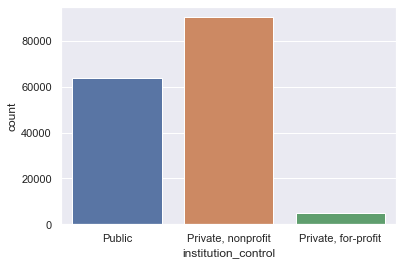

In [75]:
sns.countplot(x='institution_control', data=df_explore)

## split data

In [144]:
def split_data(df):
    
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=123)
    
    return train, validate, test

In [146]:
train, validate, test = split_data(df_explore)
train.shape, validate.shape, test.shape

((88922, 117), (38110, 117), (31758, 117))

### explore on train set

In [147]:
missing = nulls_by_col(train)
missing[missing.percent_rows_missing == 0]

,num_rows_missing,percent_rows_missing
lat,0,0.00
avg_net_price,0,0.00
2019,0,0.00
2018,0,0.00
2017,0,0.00
major_category,0,0.00
college_name,0,0.00
institution_control,0,0.00
online_only,0,0.00
avg_net_price_private,0,0.00


### 1. which type of college has the highest earning?

<AxesSubplot:xlabel='institution_control', ylabel='2019'>

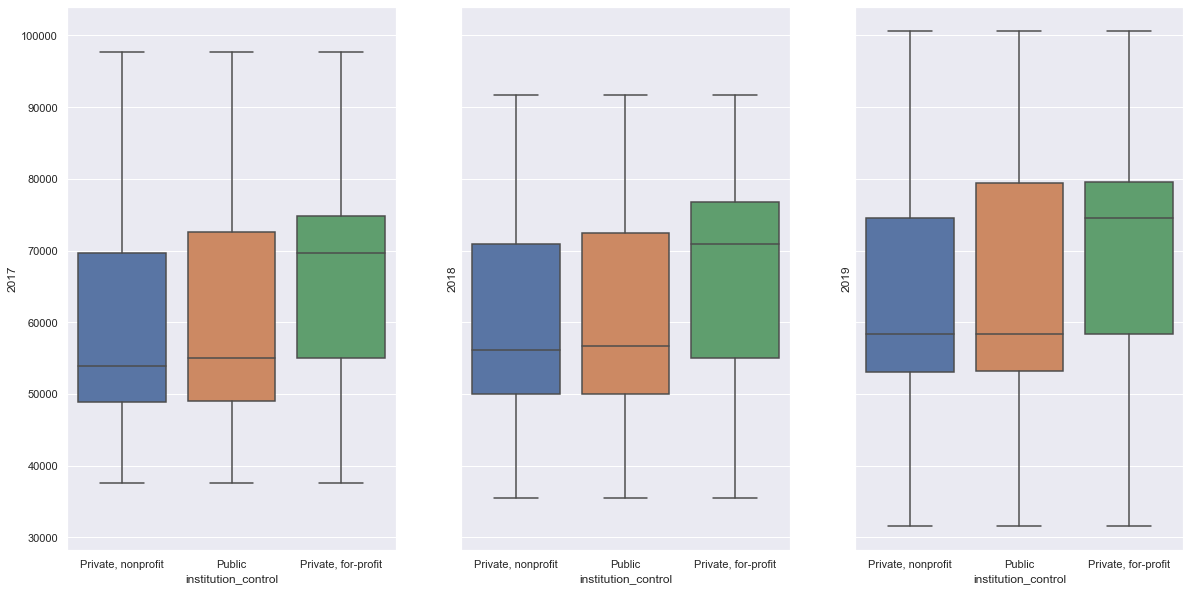

In [93]:
figure, axes = plt.subplots(1,3, sharey = True, figsize=(20,10))
    
sns.boxplot(x='institution_control', y='2017', data = train, ax=axes[0])
sns.boxplot(x='institution_control', y='2018', data = train, ax=axes[1])
sns.boxplot(x='institution_control', y='2019', data = train, ax=axes[2])

### Answer 1. private for profit has the highest earning.

### 2. what types of college are in-person school and online school?

In [94]:
df_explore.online_only.value_counts()

0.00    157692
1.00      1098
Name: online_only, dtype: int64

<AxesSubplot:xlabel='institution_control', ylabel='count'>

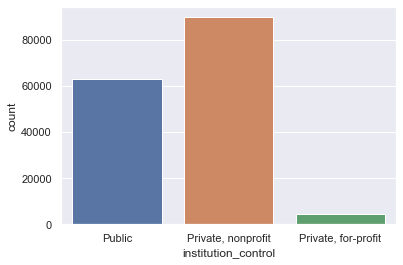

In [95]:
# in-persoon
sns.countplot(x='institution_control', data=df_explore[df_explore.online_only == 0])

<AxesSubplot:xlabel='institution_control', ylabel='count'>

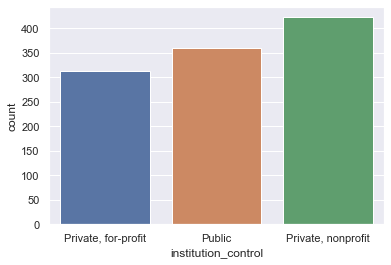

In [96]:
# online
sns.countplot(x='institution_control', data=df_explore[df_explore.online_only == 1])

### 3. Does in-person earning more or online earning more?

<AxesSubplot:xlabel='online_only', ylabel='2019'>

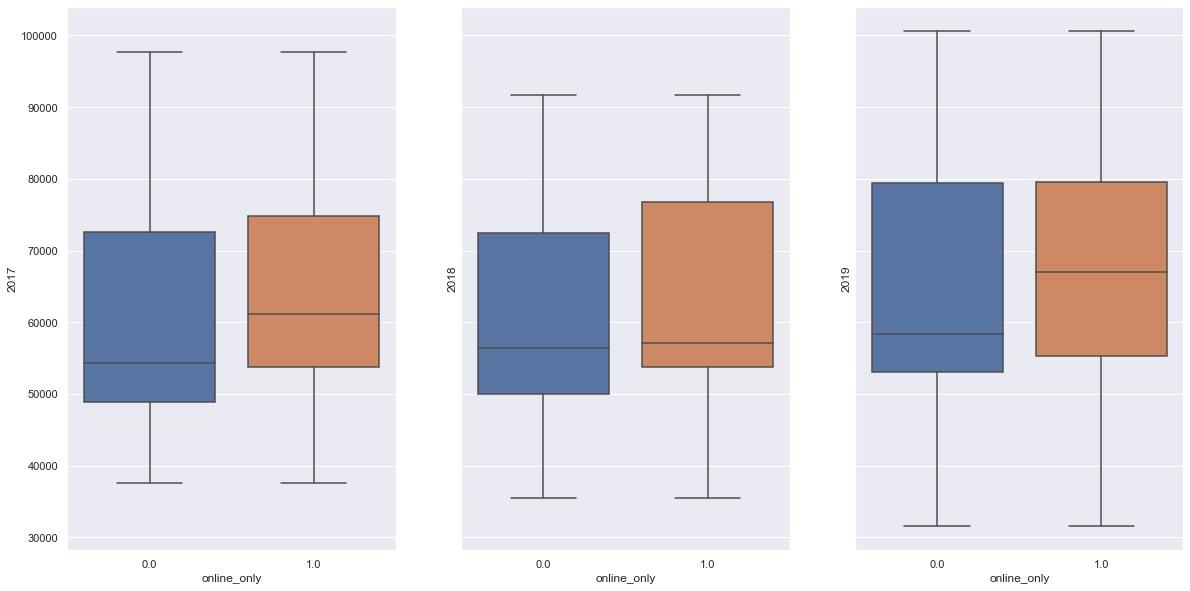

In [97]:
figure, axes = plt.subplots(1,3, sharey = True, figsize=(20,10))
    
sns.boxplot(x='online_only', y='2017', data = train, ax=axes[0])
sns.boxplot(x='online_only', y='2018', data = train, ax=axes[1])
sns.boxplot(x='online_only', y='2019', data = train, ax=axes[2])

### 4. how is the tuition different in different type of school?

<AxesSubplot:xlabel='institution_control', ylabel='avg_net_price'>

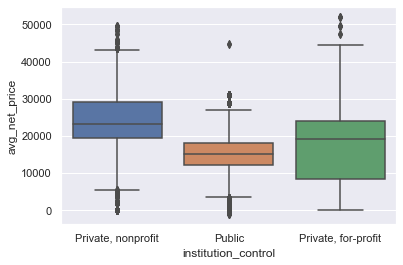

In [148]:
sns.boxplot(x='institution_control', y='avg_net_price', data = train)

### 5. how is the tuition different by major?

In [157]:
train.groupby('major_category').avg_net_price.mean().nlargest(50)

major_category
Area, Ethnic, and Civilization Studies                                  22,672.89
Architecture                                                            22,361.30
Interdisciplinary and Multi-Disciplinary Studies (General)              21,445.34
Communication Technologies                                              21,431.94
Fine Arts                                                               21,295.97
Linguistics and Foreign Languages                                       21,223.90
Philosophy and Religious Studies                                        21,215.95
Library Science                                                         21,210.67
Communications                                                          20,788.61
Mathematics and Statistics                                              20,754.58
Engineering                                                             20,731.66
Biology and Life Sciences                                               20,637.50
E

In [163]:
plt.figure(figsize=(20, 4))
train.plot.barh(x='major_category', y='avg_net_price', data=train)

TypeError: barh() missing 1 required positional argument: 'width'

<Figure size 1440x288 with 0 Axes>